<a href="https://colab.research.google.com/github/andreavittino/colab_notebooks/blob/main/RNN_ImageClass_fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# we load in the data 
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# We rescale the data and look at the number of classes we have
X_train, X_test = X_train/255., X_test/255.
K = len(set(y_train))
print("the number of classes is: {}".format(K))

the number of classes is: 10


In [4]:
# we build the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.LSTM(128,input_shape = X_train[0].shape,return_sequences=True),
                                    tf.keras.layers.GlobalMaxPool1D(),
                                    tf.keras.layers.Dense(K,activation = 'softmax')
])

In [5]:
# We compile and train the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r = model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5863 - accuracy: 0.7888 - val_loss: 0.4463 - val_accuracy: 0.8335
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3972 - accuracy: 0.8529 - val_loss: 0.3908 - val_accuracy: 0.8598
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3536 - accuracy: 0.8697 - val_loss: 0.3688 - val_accuracy: 0.8656
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3232 - accuracy: 0.8810 - val_loss: 0.3434 - val_accuracy: 0.8727
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2989 - accuracy: 0.8894 - val_loss: 0.3248 - val_accuracy: 0.8832
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2830 - accuracy: 0.8956 - val_loss: 0.3177 - val_accuracy: 0.8834
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2668 - accuracy: 0.9012 - val_loss: 0.2997 - val_accuracy:

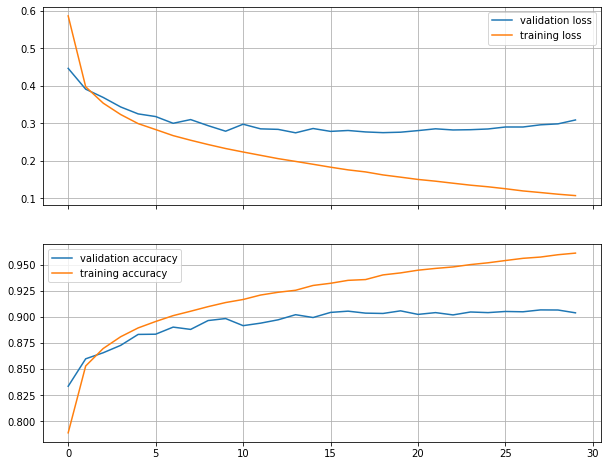

In [7]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,8),sharex=True)
ax[0].plot(r.history['val_loss'], label = 'validation loss')
ax[0].plot(r.history['loss'], label = 'training loss')
ax[0].legend()
ax[1].plot(r.history['val_accuracy'],label = 'validation accuracy')
ax[1].plot(r.history['accuracy'],label = 'training accuracy')
ax[1].legend()
ax[0].grid()
ax[1].grid()